In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3
from keras.layers import Dense,Flatten,Dropout

Using TensorFlow backend.


In [2]:
train_datagen = ImageDataGenerator(rescale = 1/255,shear_range = 0.2, zoom_range = 0.2,horizontal_flip = True, validation_split = 0.2)
path = r'.\data\Train_cartoon'
train_generator = train_datagen.flow_from_directory(path,target_size=(150, 150),subset = 'training')
validation_generator = train_datagen.flow_from_directory(path,target_size=(150, 150),subset = 'validation')

Found 3170 images belonging to 6 classes.
Found 789 images belonging to 6 classes.


In [3]:
pre_trained = InceptionV3(
    include_top = False,
    weights = None,
    input_tensor = None,
    input_shape=(150,150,3)
)

weight_path = 'inception_weights.h5'
pre_trained.load_weights(weight_path)

for layer in pre_trained.layers:
    layer.trainable = False
    
pre_trained.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
_______________________________________________________________________________________

In [4]:
last_layer = pre_trained.get_layer('mixed10')
last_output = last_layer.output

y = Flatten()(last_output)
y = Dense(256,activation = 'relu')(y)
y = Dropout(0.2)(y)
y = Dense(6,activation = 'softmax')(y)
from keras.models import Model

model = Model(pre_trained.input,y)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

batch_normalization_50 (BatchNo (None, 7, 7, 192)    576         conv2d_50[0][0]                  
__________________________________________________________________________________________________
activation_41 (Activation)      (None, 7, 7, 192)    0           batch_normalization_41[0][0]     
__________________________________________________________________________________________________
activation_44 (Activation)      (None, 7, 7, 192)    0           batch_normalization_44[0][0]     
__________________________________________________________________________________________________
activation_49 (Activation)      (None, 7, 7, 192)    0           batch_normalization_49[0][0]     
__________________________________________________________________________________________________
activation_50 (Activation)      (None, 7, 7, 192)    0           batch_normalization_50[0][0]     
__________________________________________________________________________________________________
mixed5 (Co

In [11]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam

adam = Adam(lr = 0.0001)
early_stopping_cb = EarlyStopping(patience = 20, restore_best_weights = True, monitor = 'val_accuracy')
checkpoint_cb = ModelCheckpoint('model2.h5', save_best_only = True)
model.compile(loss = 'categorical_crossentropy',optimizer = adam, metrics = ['accuracy'])

In [12]:
history = model.fit(train_generator,validation_data = validation_generator ,epochs = 100, callbacks = [checkpoint_cb,early_stopping_cb])

Epoch 1/100
100/100 [==============================] - 47s 466ms/step - loss: 0.3693 - accuracy: 0.8855 - val_loss: 2.9871 - val_accuracy: 0.5894
Epoch 2/100
100/100 [==============================] - 40s 402ms/step - loss: 0.3710 - accuracy: 0.8912 - val_loss: 2.3119 - val_accuracy: 0.6071
Epoch 3/100
100/100 [==============================] - 40s 403ms/step - loss: 0.3139 - accuracy: 0.8984 - val_loss: 2.2750 - val_accuracy: 0.5754
Epoch 4/100
100/100 [==============================] - 40s 403ms/step - loss: 0.2970 - accuracy: 0.9032 - val_loss: 1.2619 - val_accuracy: 0.6071
Epoch 5/100
100/100 [==============================] - 41s 405ms/step - loss: 0.2604 - accuracy: 0.9221 - val_loss: 2.1844 - val_accuracy: 0.6109
Epoch 6/100
100/100 [==============================] - 41s 405ms/step - loss: 0.2630 - accuracy: 0.9082 - val_loss: 2.8669 - val_accuracy: 0.6033
Epoch 7/100
100/100 [==============================] - 40s 396ms/step - loss: 0.2636 - accuracy: 0.9117 - val_loss: 2.5768 -

Epoch 57/100
100/100 [==============================] - 40s 401ms/step - loss: 0.1703 - accuracy: 0.9514 - val_loss: 1.7430 - val_accuracy: 0.5792
Epoch 58/100
100/100 [==============================] - 41s 408ms/step - loss: 0.1466 - accuracy: 0.9543 - val_loss: 4.4962 - val_accuracy: 0.5906
Epoch 59/100
100/100 [==============================] - 42s 421ms/step - loss: 0.1392 - accuracy: 0.9555 - val_loss: 1.7368 - val_accuracy: 0.6185


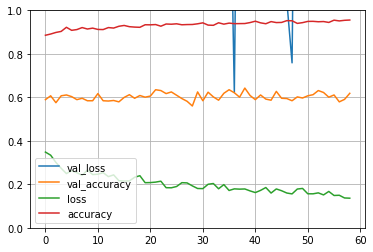

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
def plot_training_accuracy(history):
    pd.DataFrame(history.history).plot()
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_training_accuracy(history)

In [14]:
test_gen = ImageDataGenerator(rescale = 1/255)
path = r'.\data\Test_cartoon'
test_generator = test_gen.flow_from_directory(path,target_size=(150, 150))

Found 1199 images belonging to 6 classes.


In [15]:
model.evaluate(test_generator)

38/38 [==============================] - 5s 127ms/step


[3.428907871246338, 0.5963302850723267]